In [13]:
from google.colab import drive
drive.mount('/content/driver')

ModuleNotFoundError: No module named 'termios'

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
from glob import glob
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam


warnings.filterwarnings("ignore")

Using TensorFlow backend.


ContextualVersionConflict: (google-auth 1.4.2 (c:\users\h2 gaming\appdata\local\programs\python\python37\lib\site-packages), Requirement.parse('google-auth<2.0dev,>=1.14.0'), {'google-api-core'})

In [10]:

# data = pd.read_csv('/content/driver/My Drive/Deep-Learning/stock3/data_stocks.csv')
path_train = '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/*.csv'
files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_at = data['AT'].values
  data_xt = data['XT'].values
  data_ac = data['AC'].values/1000
  data_total_ac = data['TOTAL_AC'].values/1000
  data_total_at = data['TOTAL_AT'].values

#dung de lay du lieu theo cap
  data_input3D = []
  data_output2D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    temp_output_2D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_at[k])
      temp_2D.append(data_xt[k])
      temp_2D.append(data_ac[k])
      
      temp_3D.append(temp_2D)

    temp_output_2D.append(data_total_at[i])
    temp_output_2D.append(data_total_ac[i])

    data_input3D.append(temp_3D)
    data_output2D.append(temp_output_2D)

  x_input.append(data_input3D)
  y_output.append(data_output2D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape(-1,3,3)
y_train = y_train.reshape(-1,2)


[]


ValueError: need at least one array to concatenate

In [10]:
n_input = 3
n_features = 3

model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(2))
model.summary()
adam = Adam(lr=0.0005) 
model.compile(optimizer=adam, loss='mse')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20)                1920      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 1,962
Trainable params: 1,962
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train, y_train, epochs=1200, validation_split=0.2, verbose=1, batch_size=3)
model.save('/content/driver/My Drive/Deep-Learning/LSTM_Software/Code/Use Data_K60/ATXTAC_DOAN_TOTALAT_TOTALAC/3_1_ac.h5')

Train on 75 samples, validate on 19 samples
Epoch 1/1200
75/75 [==============================] - 1s 11ms/sample - loss: 903.0928 - val_loss: 43397.1502
Epoch 2/1200
75/75 [==============================] - 0s 2ms/sample - loss: 1217.1778 - val_loss: 44615.7652
Epoch 3/1200
75/75 [==============================] - 0s 1ms/sample - loss: 1367.2266 - val_loss: 42813.4006
Epoch 4/1200
75/75 [==============================] - 0s 2ms/sample - loss: 1140.6105 - val_loss: 40428.1117
Epoch 5/1200
75/75 [==============================] - 0s 1ms/sample - loss: 757.8443 - val_loss: 40777.7866
Epoch 6/1200
75/75 [==============================] - 0s 2ms/sample - loss: 1181.1731 - val_loss: 38335.9584
Epoch 7/1200
75/75 [==============================] - 0s 2ms/sample - loss: 1706.5512 - val_loss: 39010.1164
Epoch 8/1200
75/75 [==============================] - 0s 1ms/sample - loss: 1346.0123 - val_loss: 38545.2805
Epoch 9/1200
75/75 [==============================] - 0s 1ms/sample - loss: 1649.0850

[[ 7.9266853 28.820492 ]
 [ 5.243586  22.995949 ]]
[[7.2000e+00 1.8285e+04]
 [7.2000e+00 1.8285e+04]]
[28.820492 22.995949]
actually:  [[7.2000e+00 1.8285e+04]
 [7.2000e+00 1.8285e+04]]
model:  [[ 7.9266853 28.820492 ]
 [ 5.243586  22.995949 ]]


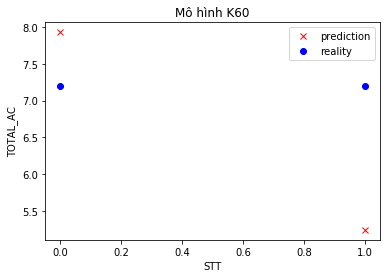

In [17]:
model = keras.models.load_model('/content/driver/My Drive/Deep-Learning/LSTM_Software/Code/Use Data_K60/ATXTAC_DOAN_TOTALAT_TOTALAC/3_1_ac.h5')
path_test = '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/test/data_6.csv'

test = pd.read_csv(path_test)
ip_test_at = test['AT'].values.astype('float64')
ip_test_xt = test['XT'].values.astype('float64') 
ip_test_ac = test['AC'].values.astype('float64')/1000
test_output_total_ac = test['TOTAL_AC'].values.astype('float64')
test_output_total_at = test['TOTAL_AT'].values.astype('float64')


x_input=[]
y_output =[]

data_input3D = []
data_output2D = []
steps = 3
for i in range(0,len(ip_test_at)-steps+1):
  temp_3D = []
  temp_output_2D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_at[k])
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_ac[k])
    
    temp_3D.append(temp_2D)

  temp_output_2D.append(test_output_total_at[i])
  temp_output_2D.append(test_output_total_ac[i])

  data_input3D.append(temp_3D)
  data_output2D.append(temp_output_2D)

x_input.append(data_input3D)
y_output.append(data_output2D)

x_test = np.asarray(x_input)
y_test = np.asarray(y_output)

x_test = x_test.reshape(-1,3,3)
y_test = y_test.reshape(-1,2)


result = model.predict(x_test)


print(result)
print(y_test)
# result = result*100
# # result = scaler.inverse_transform(result)

print(result[:,1])
plt.plot(result[:,0],'x', color='r')
plt.plot(y_test[:,0], 'o' ,color='b')
plt.title("Mô hình K60")
plt.xlabel("STT")
plt.ylabel("TOTAL_AC")
# mplcursors.cursor(hover=True)
print("actually: ",y_test)
print("model: ", result)
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()